# **Task 2: What's inside the box?**

Given the image below:

![What's in the Box](https://raw.githubusercontent.com/omzlette/FRA321_Basic_AI/main/PYCV/img/inside-the-box.jpg)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

# Read the image from URL
req = urllib.request.urlopen('https://raw.githubusercontent.com/omzlette/FRA321_Basic_AI/main/PYCV/img/inside-the-box.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE)


In [3]:
def plotImg(oriimg, newimg, cdf):
    plt.figure(figsize=(20,10))
    plt.subplot(221),plt.imshow(oriimg[0], cmap = 'gray')
    plt.title(oriimg[1]), plt.xticks([]), plt.yticks([])

    plt.subplot(222),plt.imshow(newimg[0], cmap = 'gray')
    plt.title(newimg[1]), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.plot(cdf, color = 'b')
    plt.title('Original Histogram'), plt.xlim([0,256]), plt.yticks([])
    plt.hist(oriimg[0].flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')

    plt.subplot(224), plt.plot(cdf, color = 'b')
    plt.title('New Histogram'), plt.xlim([0,256]), plt.yticks([])
    plt.hist(newimg[0].flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    
    plt.show()

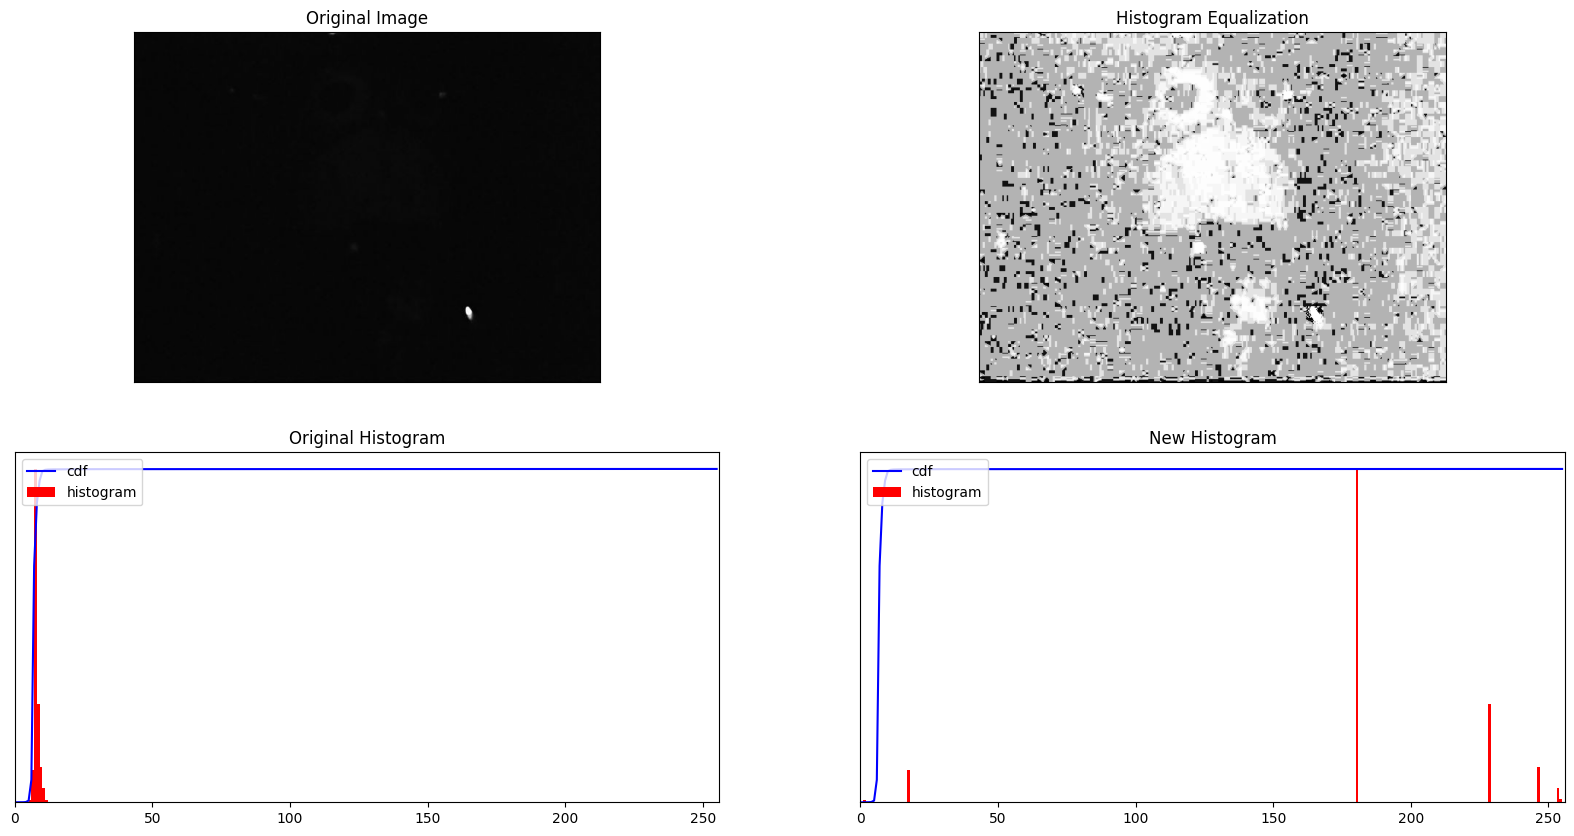

In [5]:
# Histogram equalization
hist,_ = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

# Plot the image
plotImg([img, 'Original Image'], [img2, 'Histogram Equalization'], cdf_normalized)

C:\Users\omzlette\AppData\Local\Temp\ipykernel_12756\3217185058.py:3: RuntimeWarning: divide by zero encountered in log
  img3 = c * np.log(1 + img)


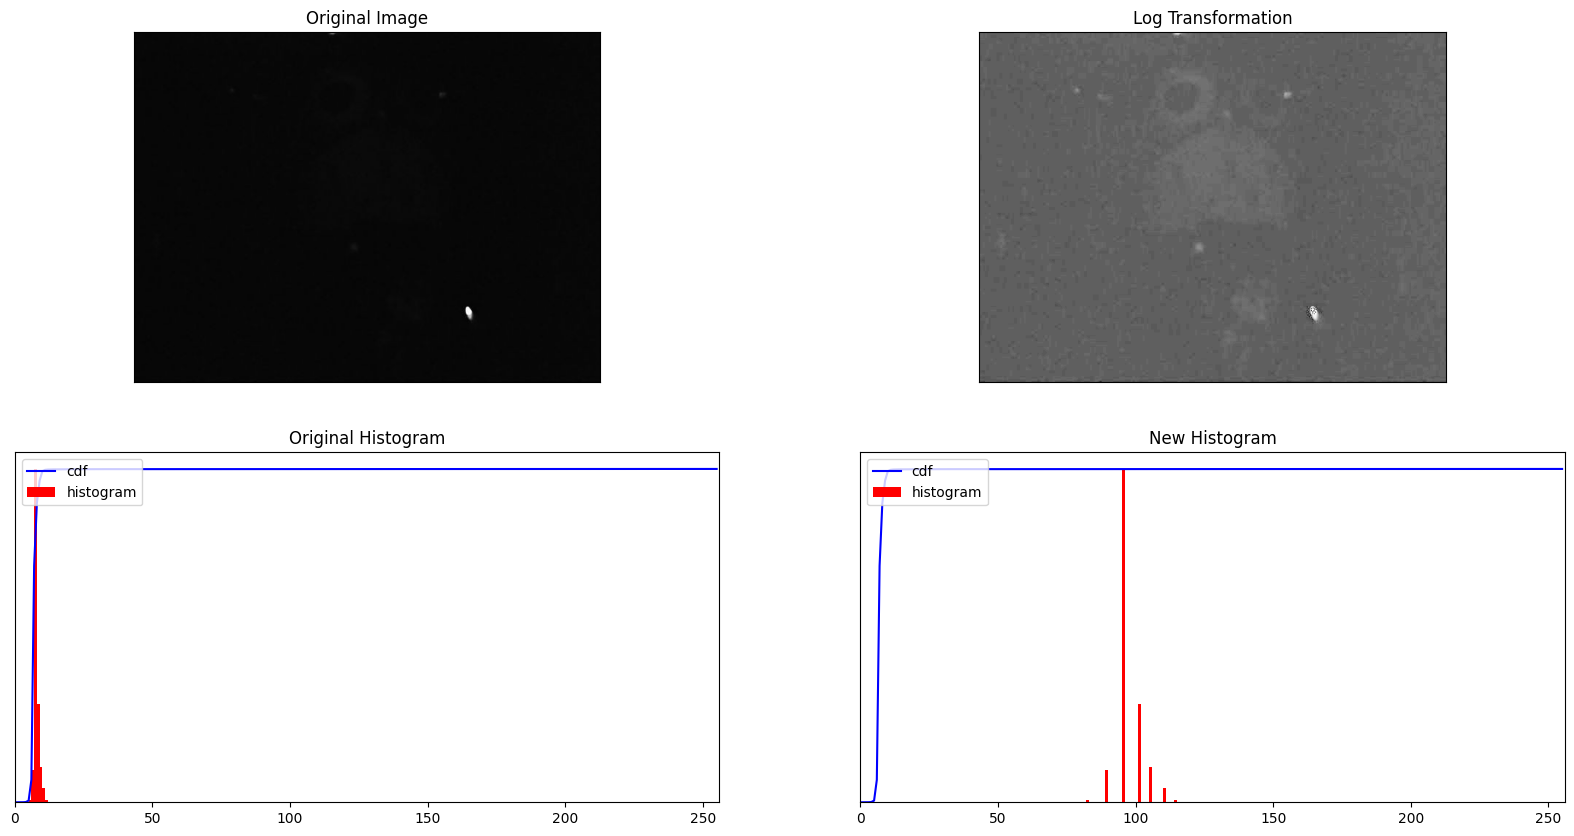

In [14]:
# Log Transformation
c = 255 / np.log(1 + np.max(img))
img3 = c * np.log(1 + img)

log_transformed = np.array(img3, dtype = np.uint8)

# Plot the image
plotImg([img, 'Original Image'], [log_transformed, 'Log Transformation'], cdf_normalized)

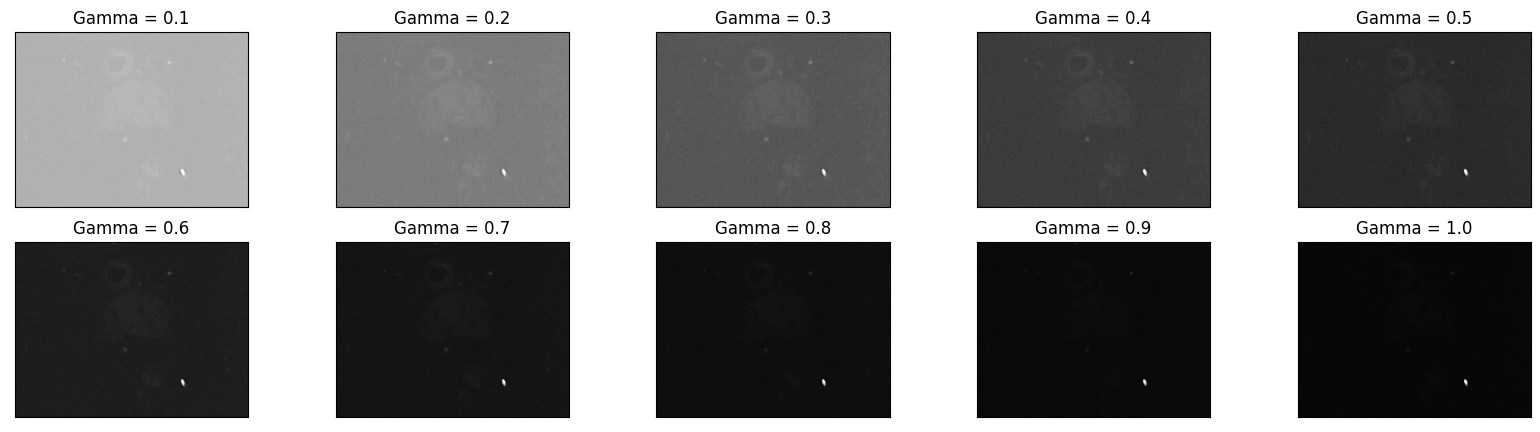

In [19]:
# Power Law Transformation
plt.figure(figsize=(20,5))

for count, gamma in enumerate(np.arange(0.1, 1.1, 0.1)):
    gamma_corr = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
    plt.subplot(2,5,count+1), plt.imshow(gamma_corr, cmap = 'gray')
    plt.title('Gamma = %.1f' % gamma), plt.xticks([]), plt.yticks([])

plt.show()

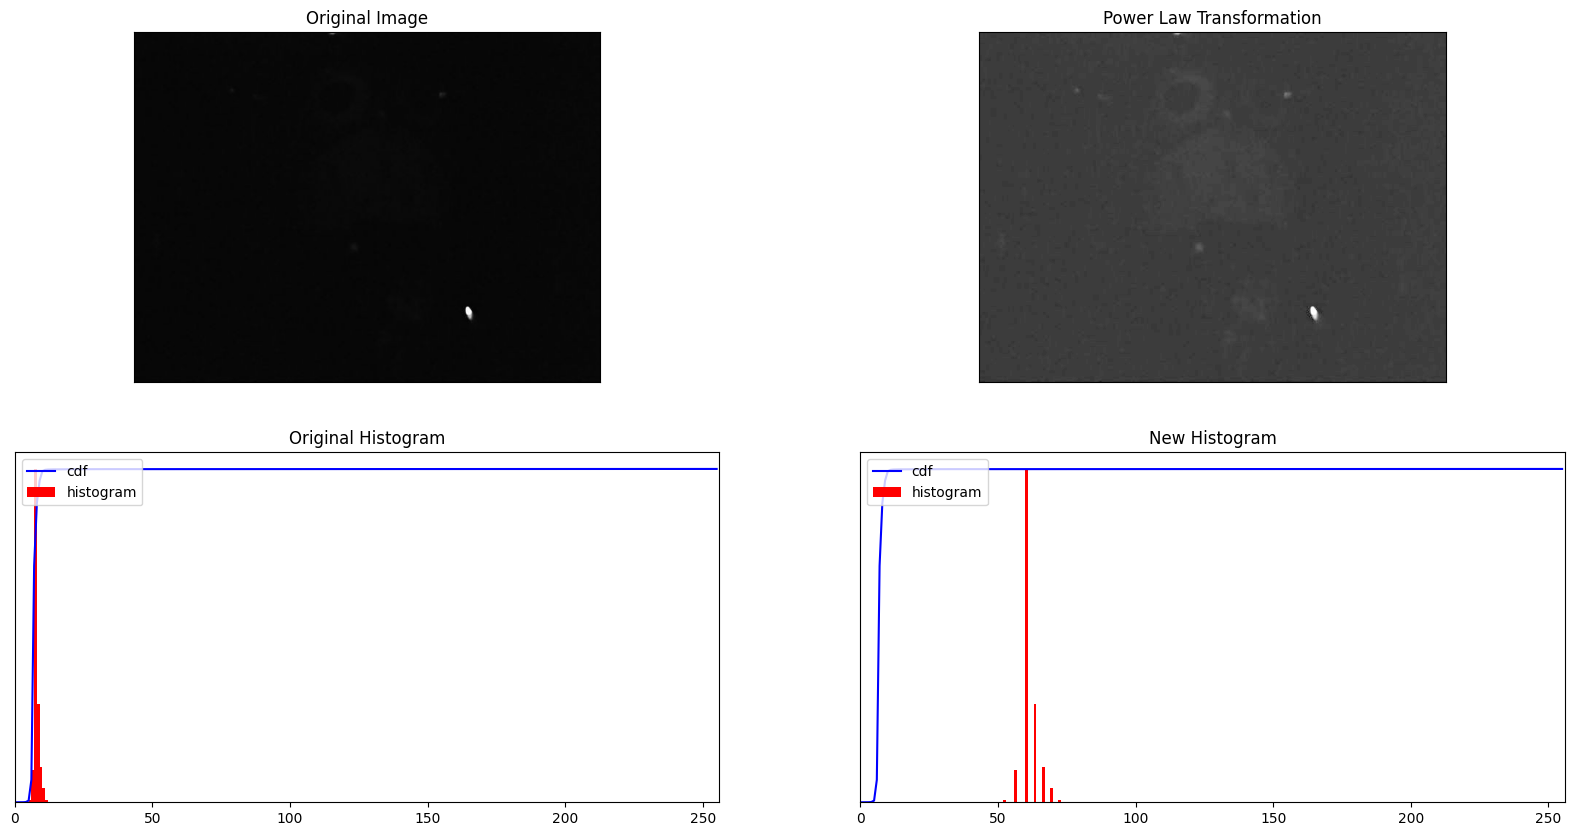

In [20]:
bestGamma = 0.4
gamma_corr = np.array(255*(img / 255) ** bestGamma, dtype = 'uint8')

# Plot the image
plotImg([img, 'Original Image'], [gamma_corr, 'Power Law Transformation'], cdf_normalized)

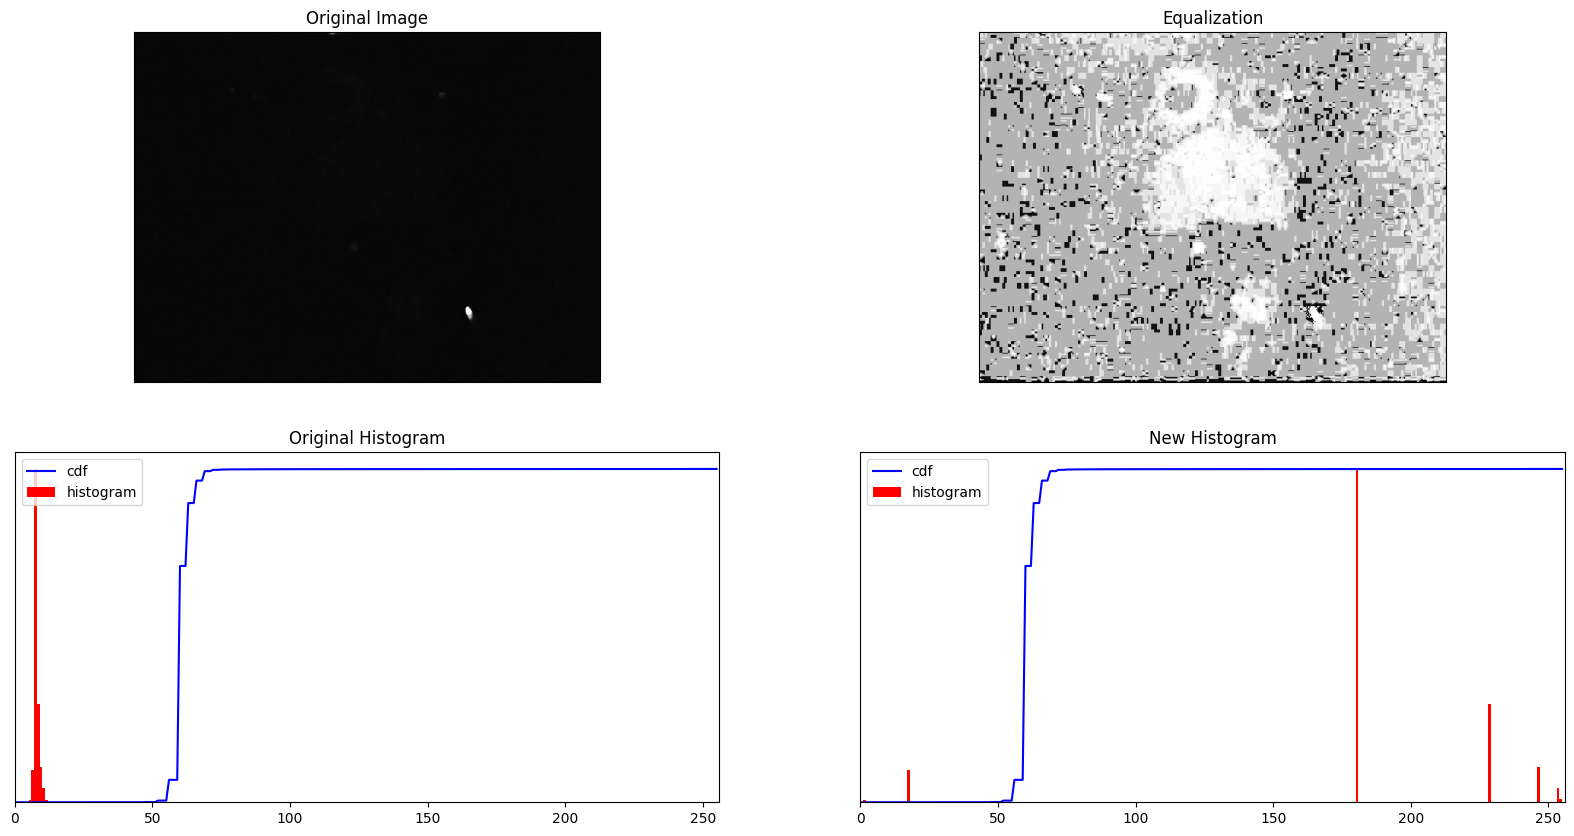

In [25]:
# Equalization (Gamma Img)
hist,_ = np.histogram(gamma_corr.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img4 = cdf[gamma_corr]

# Plot the image
plotImg([img, 'Original Image'], [img4, 'Equalization'], cdf_normalized)

## **Conslusion**

จากที่ลองทำมา รูปภาพดูเหมือนเป็น <u>__เป็ด__</u>